In [99]:
import pandas as pd
from sklearn import datasets 

In [100]:
data = datasets.load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

X = data.data #input 

y = data.target #output

df.to_csv('diabetes_data.csv', index = False)
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

### data preprocessing : clean the data, convert the categorical (text) to numerical values
### input to ML model must be number. (X - input, y- output) 

#### Step 1: split the data into training and testing set (to avoid overfit)

#### Step 2: train ML model using the available training set

#### Step 3: evaluate the performance for the training set, testing set 

#### Step 4: fine-tune parameters to balance the performance 

In [101]:
X = df[['age']].values

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

In [103]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

steps = [("imp_mean", SimpleImputer()), # cleaning the data - replace the missing data with average
         ("scale", StandardScaler()),  #standardizing the data 
         ("linear", LinearRegression()) ] # linear model - ML 

pipeline = Pipeline(steps)

model = pipeline.fit(X_train, y_train)

y_pred = model.predict(X_train)

linear_regressor = pipeline.named_steps['linear']

# Print the intercept and coefficients
print(f"Intercept: {linear_regressor.intercept_}")
print(f"Coefficients: {linear_regressor.coef_}")

Intercept: 151.02641509433963
Coefficients: [14.67476806]


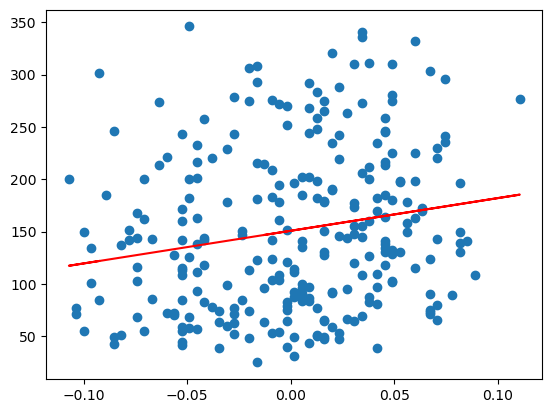

In [104]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, label='Data Points')
plt.plot(X_train, y_pred, color='red', label='Linear Regression')
plt.show()

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train,y_pred)
print('training')
print('mae:', round(mae), 'mse:', round(mse), 'r2 score:', round(r2, 2))

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print('testing')
print('mae:', round(mae), 'mse:', round(mse), 'r2 score:', round(r2, 2))

training
mae: 64 mse: 5765 r2 score: 0.04
testing
mae: 65 mse: 5659 r2 score: 0.03
